In [2]:
#matoplotlib, astropy
#import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import astropy.units as u
import patchworklib as pw

In [ ]:
#sunpy
import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

In [9]:
#pandas, numpy
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns

# Retrieving downloaded Fits images and Mapping

In [7]:
fits_file_paths = []

# Specify the path to the file containing the list of FITS file paths
file_path = "FITSimages"

# Open the file and read the FITS file paths into the list
with open(file_path, "r") as file:
    fits_file_paths = [line.strip() for line in file]


In [8]:
fits_file_paths

['/Users/synergy/sunpy/data/aia_lev1_171a_2011_06_07t06_33_02_77z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_06_14t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_06_21t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_06_28t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_07_05t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_07_12t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_07_19t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_07_26t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_08_02t06_33_12_35z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_08_09t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_08_16t06_33_12_34z_image_lev1.fits',
 '/Users/synergy/sunpy/data/aia_lev1_171a_2011_08_23t06_33_12_34z_image_lev1

In [6]:
#Mapping FITS images to map object
Maps=sunpy.map.Map(fits_file_paths)

# Functions to get regions of interest from FITS images semi automatically

In [8]:
#SubMap  cutout functions
coords = []

def onclick(event):
    global coords  # Declare coords as a global variable
    ix, iy = int(event.xdata), int(event.ydata)
    coords.append((ix, iy))
    # Draw the square on the image
    rect = patches.Rectangle((ix, iy), 512, 512, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.draw()

def getSubmaps(FitsMaps, path):
    # Loop through images to get loop cutouts
    submaps_files = []
    #SubMapVals = np.empty(shape=[0, 512*512])  # Initialize as an empty array
    i = 0  # Initialize the counter for how many submaps are created

    for img in FitsMaps: 
        aia_map = sunpy.map.Map(img)
        fig = plt.figure(figsize=(10, 10))
        fig.canvas.mpl_connect('button_press_event', onclick)
        aia_map.plot(clip_interval=(1, 99.99) * u.percent)
        plt.show(block=True)
        #print("Coords for this image are", coords)

        for (x, y) in coords:
            loop = img.submap((x, y) * u.pixel, height=511 * u.pixel, width=511 * u.pixel)
        #print("submap shape", loop.data.shape)
           # SubMapVals = np.concatenate((SubMapVals, [loop.data.flatten()]), axis=0)
            #print("size of numpy array", SubMapVals.shape)
            loop.save(f"{path}subimg{i}.fits", overwrite=True)
            submaps_files.append(f"{path}subimg{i}.fits")
            i += 1

        coords.clear()  # Clear the coords list for the next image

    return submaps_files

In [11]:
%matplotlib auto
Maps[1].peek()

Using matplotlib backend: MacOSX


# Getting ROI Submaps

In [ ]:
#extracting loop cutouts
#loopFiles=getSubmaps(Maps,"Data/loop/")

In [ ]:
#extracting no loop cutouts
#noLoopFiles, noloopNp=getSubmaps(Maps,"Data/Noloop/")

In [ ]:
#DarkNoLoopFiles=getSubmaps(Maps,"Data/DarkNoloop/")

In [8]:
partialLoop=getSubmaps(Maps,"Data/PartialLoop/")

# Getting the cutout files from local folder

In [12]:
 
loopFiles = glob.glob(r"/Users/synergy/Documents/Research/AstroPySunPy/Sample Analysis/Data/Loop/*.fits")
noLoopFiles = glob.glob(r"/Users/synergy/Documents/Research/AstroPySunPy/Sample Analysis/Data/NoLoop/*.fits")
DarkNoLoopFiles = glob.glob(r"/Users/synergy/Documents/Research/AstroPySunPy/Sample Analysis/Data/DarkNoLoop/*.fits")

In [13]:
PartialLoopFiles = glob.glob(r"/Users/synergy/Documents/Research/AstroPySunPy/Sample Analysis/Data/PartialLoop/*.fits")


In [7]:
loopNp=np.empty(shape=[0, 512*512], dtype=int)
noloopNp=np.empty(shape=[0, 512*512], dtype=int)
#DarkNoloopNp=np.empty(shape=[0, 512*512], dtype=int)
PartialLoopNp=np.empty(shape=[0, 512*512], dtype=int)

LoopSubMaps=sunpy.map.Map(loopFiles, sequence=True)
noLoopSubMaps=sunpy.map.Map(noLoopFiles, sequence=True)
#DarkNoLoopSubMaps=sunpy.map.Map(DarkNoLoopFiles, sequence=True)
PartialLoopSubMaps=sunpy.map.Map(PartialLoopFiles, sequence=True)

for i in range(len(loopFiles)):
    loopNp=np.concatenate((loopNp, [LoopSubMaps[i].data.flatten()]),axis=0)
    noloopNp=np.concatenate((noloopNp, [noLoopSubMaps[i].data.flatten()]),axis=0)
    #DarkNoloopNp=np.concatenate((DarkNoloopNp, [DarkNoLoopSubMaps[i].data.flatten()]),axis=0)


NameError: name 'loopFiles' is not defined

In [15]:
for i in range(len(PartialLoopFiles)):
    PartialLoopNp=np.concatenate((PartialLoopNp, [PartialLoopSubMaps[i].data.flatten()]),axis=0)

# Visualizing the cutouts

In [18]:
#Loop cutouts view
%matplotlib auto
fig = plt.figure()
ax = fig.add_subplot(projection=LoopSubMaps.maps[0])
ani = LoopSubMaps.plot(axes=ax, clip_interval=(1, 99.99) * u.percent, interval=2000)
plt.show()

Using matplotlib backend: MacOSX


In [19]:
##noLoop cutouts view

fig = plt.figure()
ax = fig.add_subplot(projection=noLoopSubMaps.maps[0])
ani = noLoopSubMaps.plot(axes=ax, clip_interval=(1, 99.99) * u.percent, interval=2000)
plt.show()

In [ ]:
#Dark No Looop Cutouts
%matplotlib auto
fig = plt.figure()
ax = fig.add_subplot(projection=DarkNoLoopSubMaps.maps[0])
ani = DarkNoLoopSubMaps.plot(axes=ax, clip_interval=(1, 99.99) * u.percent, interval=2000)
plt.show()

# Stat Analysis

In [ ]:
# 1st version
# df=pd.DataFrame()
# df['ImageFile']=loopFiles+noLoopFiles+DarkNoLoopFiles
# df['LoopStatus']=np.concatenate(
#     (
#         np.ones(len(loopFiles), dtype = int), 
#         np.zeros(len(noLoopFiles), dtype = int),
#        #np.zeros(len(darkloopFiles), dtype = int)
#         ), axis=None
#     )
# df['LoopStatus']=df['LoopStatus'].map({1:'Loop',0:'NoLoop', 2:'DarkestNoLoop'})

# Calculating Features

In [35]:
#partial loop version
df=pd.DataFrame()
df['ImageFile']=loopFiles+noLoopFiles+ PartialLoopFiles
df['LoopStatus']=np.concatenate(
    (
        np.ones(len(loopFiles), dtype = int), 
        2*np.ones(len(noLoopFiles), dtype = int),
        3*np.ones(len(PartialLoopFiles), dtype = int)
        ), axis=None
    )
df['LoopStatus']=df['LoopStatus'].map({1:'Loop',2:'PartialLoop', 3:'NoLoop'})

In [37]:
df["Min"]=np.concatenate((
    np.min(loopNp, axis=1),
    np.min(noloopNp,axis=1),
    np.min(PartialLoopNp,axis=1)))

In [38]:
df["Max"]=np.concatenate((
    np.max(loopNp, axis=1), 
    np.max(noloopNp,axis=1),
    np.max(PartialLoopNp,axis=1)
    ))
df["MeanVal"]=np.concatenate((
    np.mean(loopNp, axis=1), 
    np.mean(noloopNp,axis=1),
    np.mean(PartialLoopNp,axis=1)
    ))
df['TrimMean']=np.concatenate((
    stats.trim_mean(loopNp, .1, axis=1),
    stats.trim_mean(noloopNp, .1, axis=1),
    stats.trim_mean(PartialLoopNp, .1, axis=1),
    ))
df["MedVal"]=np.concatenate((
    np.median(loopNp, axis=1), 
    np.median(noloopNp,axis=1),
    np.median(PartialLoopNp,axis=1)
    ))
df['StandDiv']=np.concatenate((
    np.std(loopNp, axis=1), 
    np.std(noloopNp,axis=1),
    np.std(PartialLoopNp,axis=1)
    ))
df["Q1"]=np.concatenate((
    np.quantile(loopNp,.25, axis=1), 
    np.quantile(noloopNp,.25,axis=1),
    np.quantile(PartialLoopNp,.25,axis=1)
    ))
df["Q3"]=np.concatenate((
    np.quantile(loopNp,.75, axis=1),
    np.quantile(noloopNp,.75,axis=1),

    np.quantile(PartialLoopNp,.75,axis=1)
    ))
df["IQR"]=df["Q3"]-df["Q1"]

In [39]:
df.head()

,ImageFile,LoopStatus,Min,Max,MeanVal,TrimMean,MedVal,StandDiv,Q1,Q3,IQR
0,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,2,3756,97.944675,83.957104,79.0,98.052793,46.0,120.0,74.0
1,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,53,5948,594.199924,489.059776,420.0,543.965745,247.0,722.0,475.0
2,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,44,14533,871.642334,645.535038,536.0,1084.345722,258.0,1008.0,750.0
3,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,39,7183,579.443188,456.521276,338.0,615.062994,176.0,761.0,585.0
4,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,98,7244,993.929207,864.720532,749.0,774.853925,438.0,1313.0,875.0


In [ ]:
# df.to_csv('LoopStatAnalysis.csv', index=False)

In [40]:
df.to_csv('PartalLoopStatAnalysis.csv', index=False)

## Stat Viz

### BoxPlots

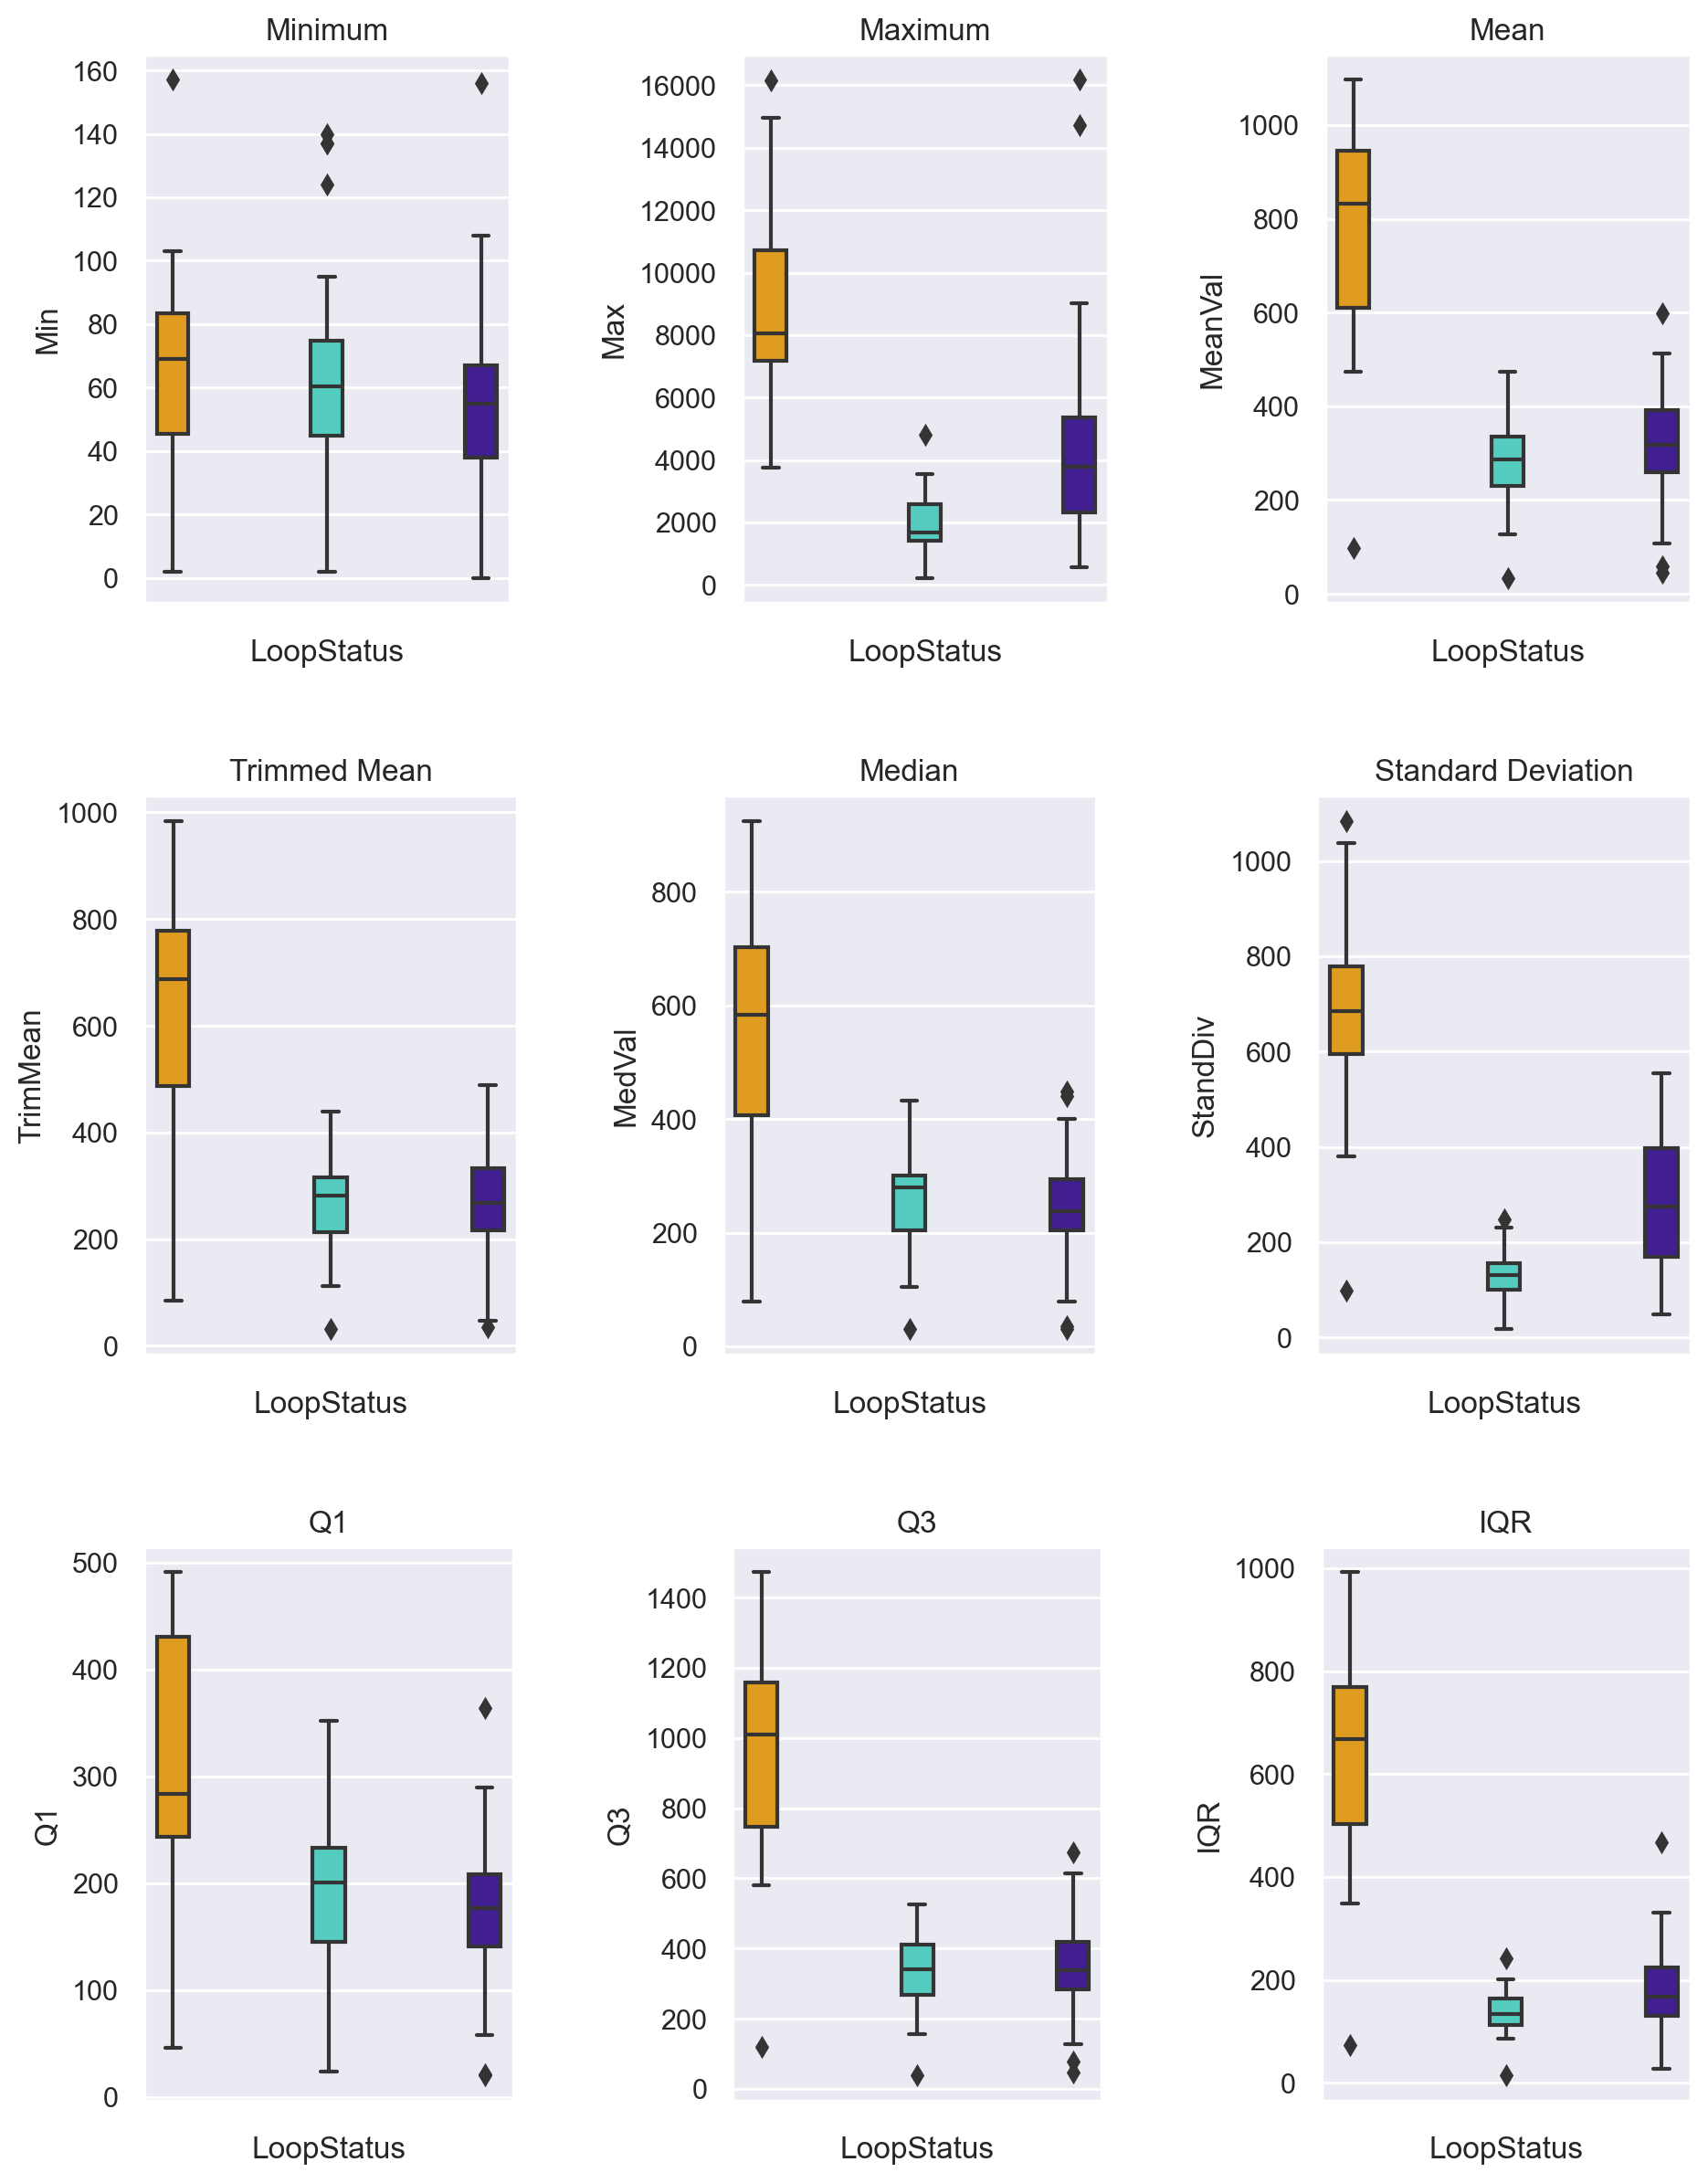

In [41]:
#BoxPLots

sns.set_theme()
nCol = df.columns[2:]
myPal=palette = ["#FFA500", '#40E0D0', "#3A0CA3"]
sns.set()

# Create a list to store the axes
ax = []
bx=[]

labs=['Minimum', 'Maximum', 'Mean', 'Trimmed Mean', 'Median', 'Standard Deviation', 'Q1', 'Q3', 'IQR']

for i, col in enumerate(df.columns[2:]):
    # Create a new subplot with pw.Brick
    ax.append(pw.Brick(figsize=(2, 3)))
    # Create a boxplot using seaborn
    fig=sns.boxplot(x="LoopStatus", y=col, hue="LoopStatus", palette=myPal, data=df, ax=ax[i])
    
    # Set the title for each subplot
    ax[i].set_title(labs[i]) #f"Boxplot for {col}"
    
    # Remove the x-axis label
   # ax[i].set(xlabel=None)
    ax[i].set(xticklabels=[])
    ax[i].legend_.remove()
    #ax[i].move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))

# Display the plots using patchworkå
#handles, labels = ax[2].get_legend_handles_labels()


axBoxplot=(ax[0]|ax[1]|ax[2])/(ax[3]|ax[4]|ax[5])/(ax[6]|ax[7]|ax[8])
#ax[2].legend(handles, labels, loc='upper right',  frameon=False)

axBoxplot.savefig('BoxPlots.png')

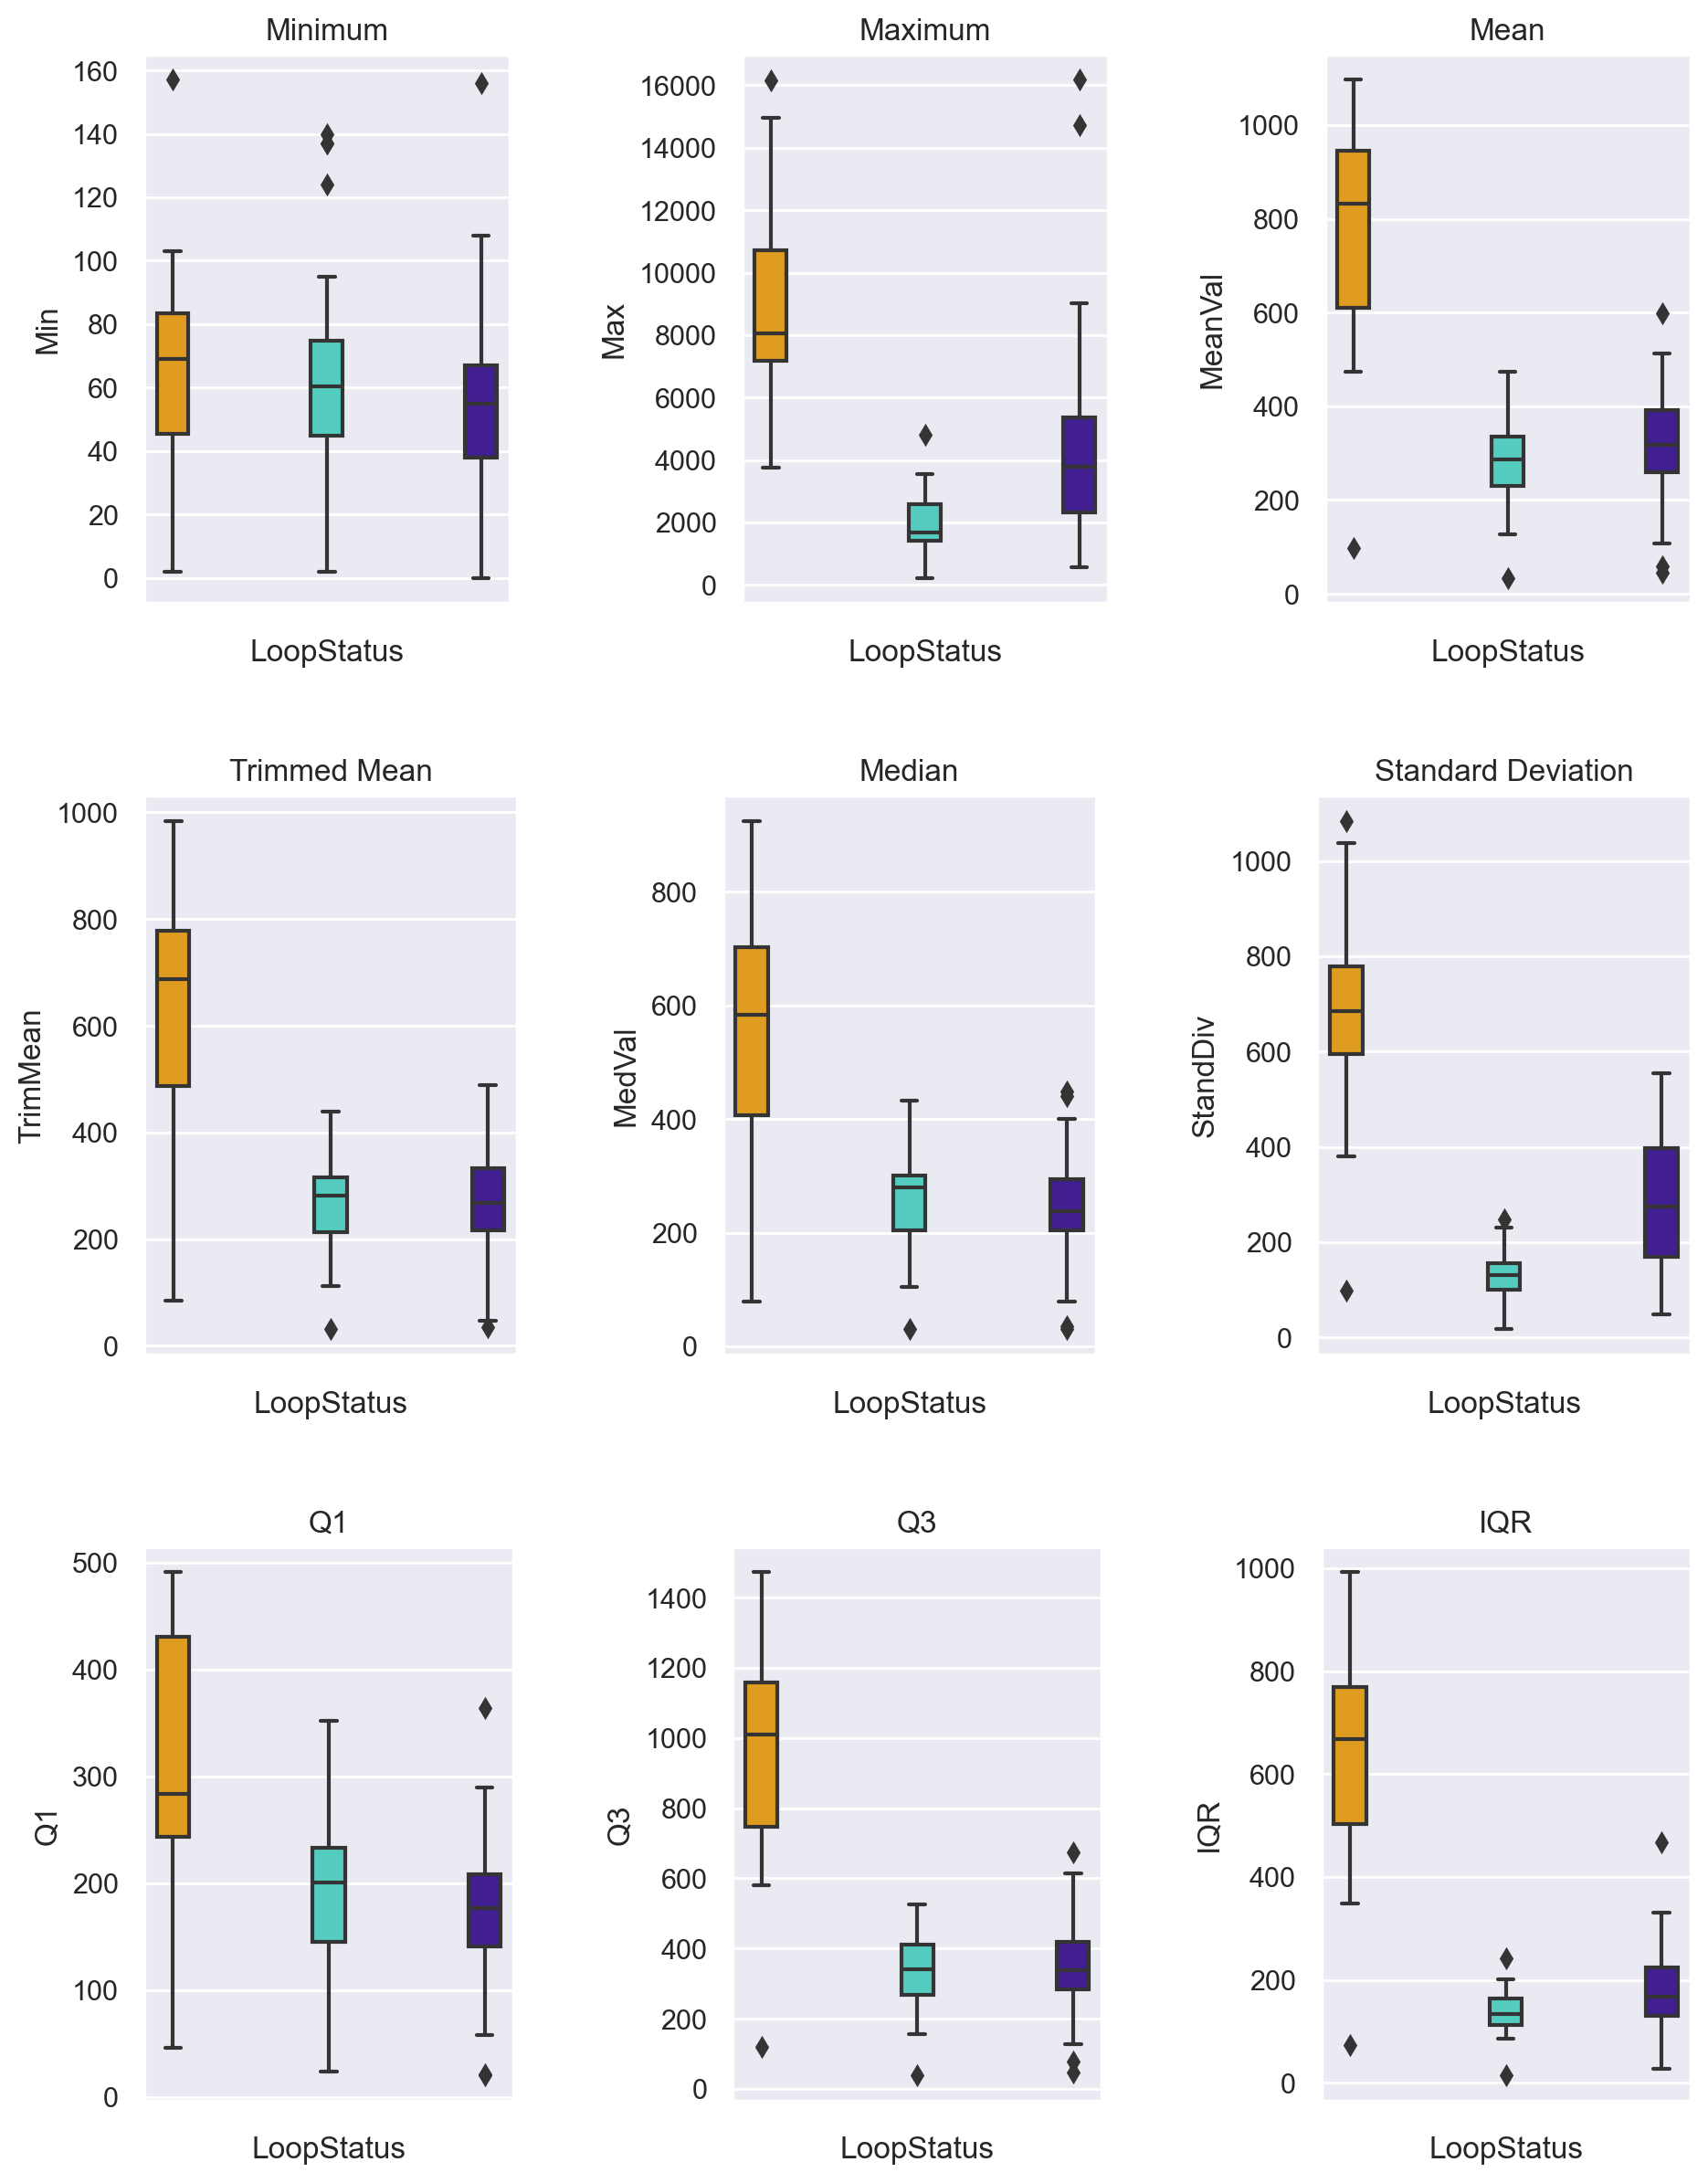

In [46]:
#boxplots partial Loop
#BoxPLots

sns.set_theme()
nCol = df.columns[2:]
myPal=palette = ["#FFA500", '#40E0D0', "#3A0CA3"]
sns.set()

# Create a list to store the axes
ax = []
bx=[]

labs=['Minimum', 'Maximum', 'Mean', 'Trimmed Mean', 'Median', 'Standard Deviation', 'Q1', 'Q3', 'IQR']

for i, col in enumerate(df.columns[2:]):
    # Create a new subplot with pw.Brick
    ax.append(pw.Brick(figsize=(2, 3)))
    # Create a boxplot using seaborn
    fig=sns.boxplot(x="LoopStatus", y=col, hue="LoopStatus", palette=myPal, data=df, ax=ax[i])
    
    # Set the title for each subplot
    ax[i].set_title(labs[i]) #f"Boxplot for {col}"
    
    # Remove the x-axis label
   # ax[i].set(xlabel=None)
    ax[i].set(xticklabels=[])
    ax[i].legend_.remove()
    #ax[i].move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))

# Display the plots using patchwork
#handles, labels = ax[2].get_legend_handles_labels()


axBoxplot=(ax[0]|ax[1]|ax[2])/(ax[3]|ax[4]|ax[5])/(ax[6]|ax[7]|ax[8])
#ax[2].legend(handles, labels, loc='upper right',  frameon=False)

axBoxplot.savefig('BoxPlotsPartial.png')

In [50]:
sns.set_theme()
nCol = df.columns[2:]
myPal = palette = ["#FFA500", '#40E0D0', "#3A0CA3"]
sns.set()

# Create a list to store the axes
ax = []

labs = ['Minimum', 'Maximum', 'Mean', 'Trimmed Mean', 'Median', 'Standard Deviation', 'Q1', 'Q3', 'IQR']

for i, col in enumerate(df.columns[2:]):
    # Create a new subplot with pw.Brick
    ax.append(pw.Brick(figsize=(2, 3)))
    # Create a boxplot using seaborn
    fig = sns.boxplot(x="LoopStatus", y=col, hue="LoopStatus", palette=myPal, data=df, ax=ax[i])

    # Set the title for each subplot
    ax[i].set_title(labs[i])  # f"Boxplot for {col}"

    # Remove the x-axis label
    ax[i].set(xticklabels=[])
    ax[i].legend_.remove()

# Display the plots using patchwork
axBoxplot = (ax[0] | ax[1] | ax[2]) / (ax[3] | ax[4] | ax[5]) / (ax[6] | ax[7] | ax[8])

# Create a single legend for the entire group using matplotlib
handles, labels = ax[0].get_legend_handles_labels()
axBoxplot += pw.legend(handles=handles, labels=labels, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

axBoxplot.save("BoxPlotsWithLegend.png")

AttributeError: module 'patchworklib' has no attribute 'legend'

: 

### Histograms

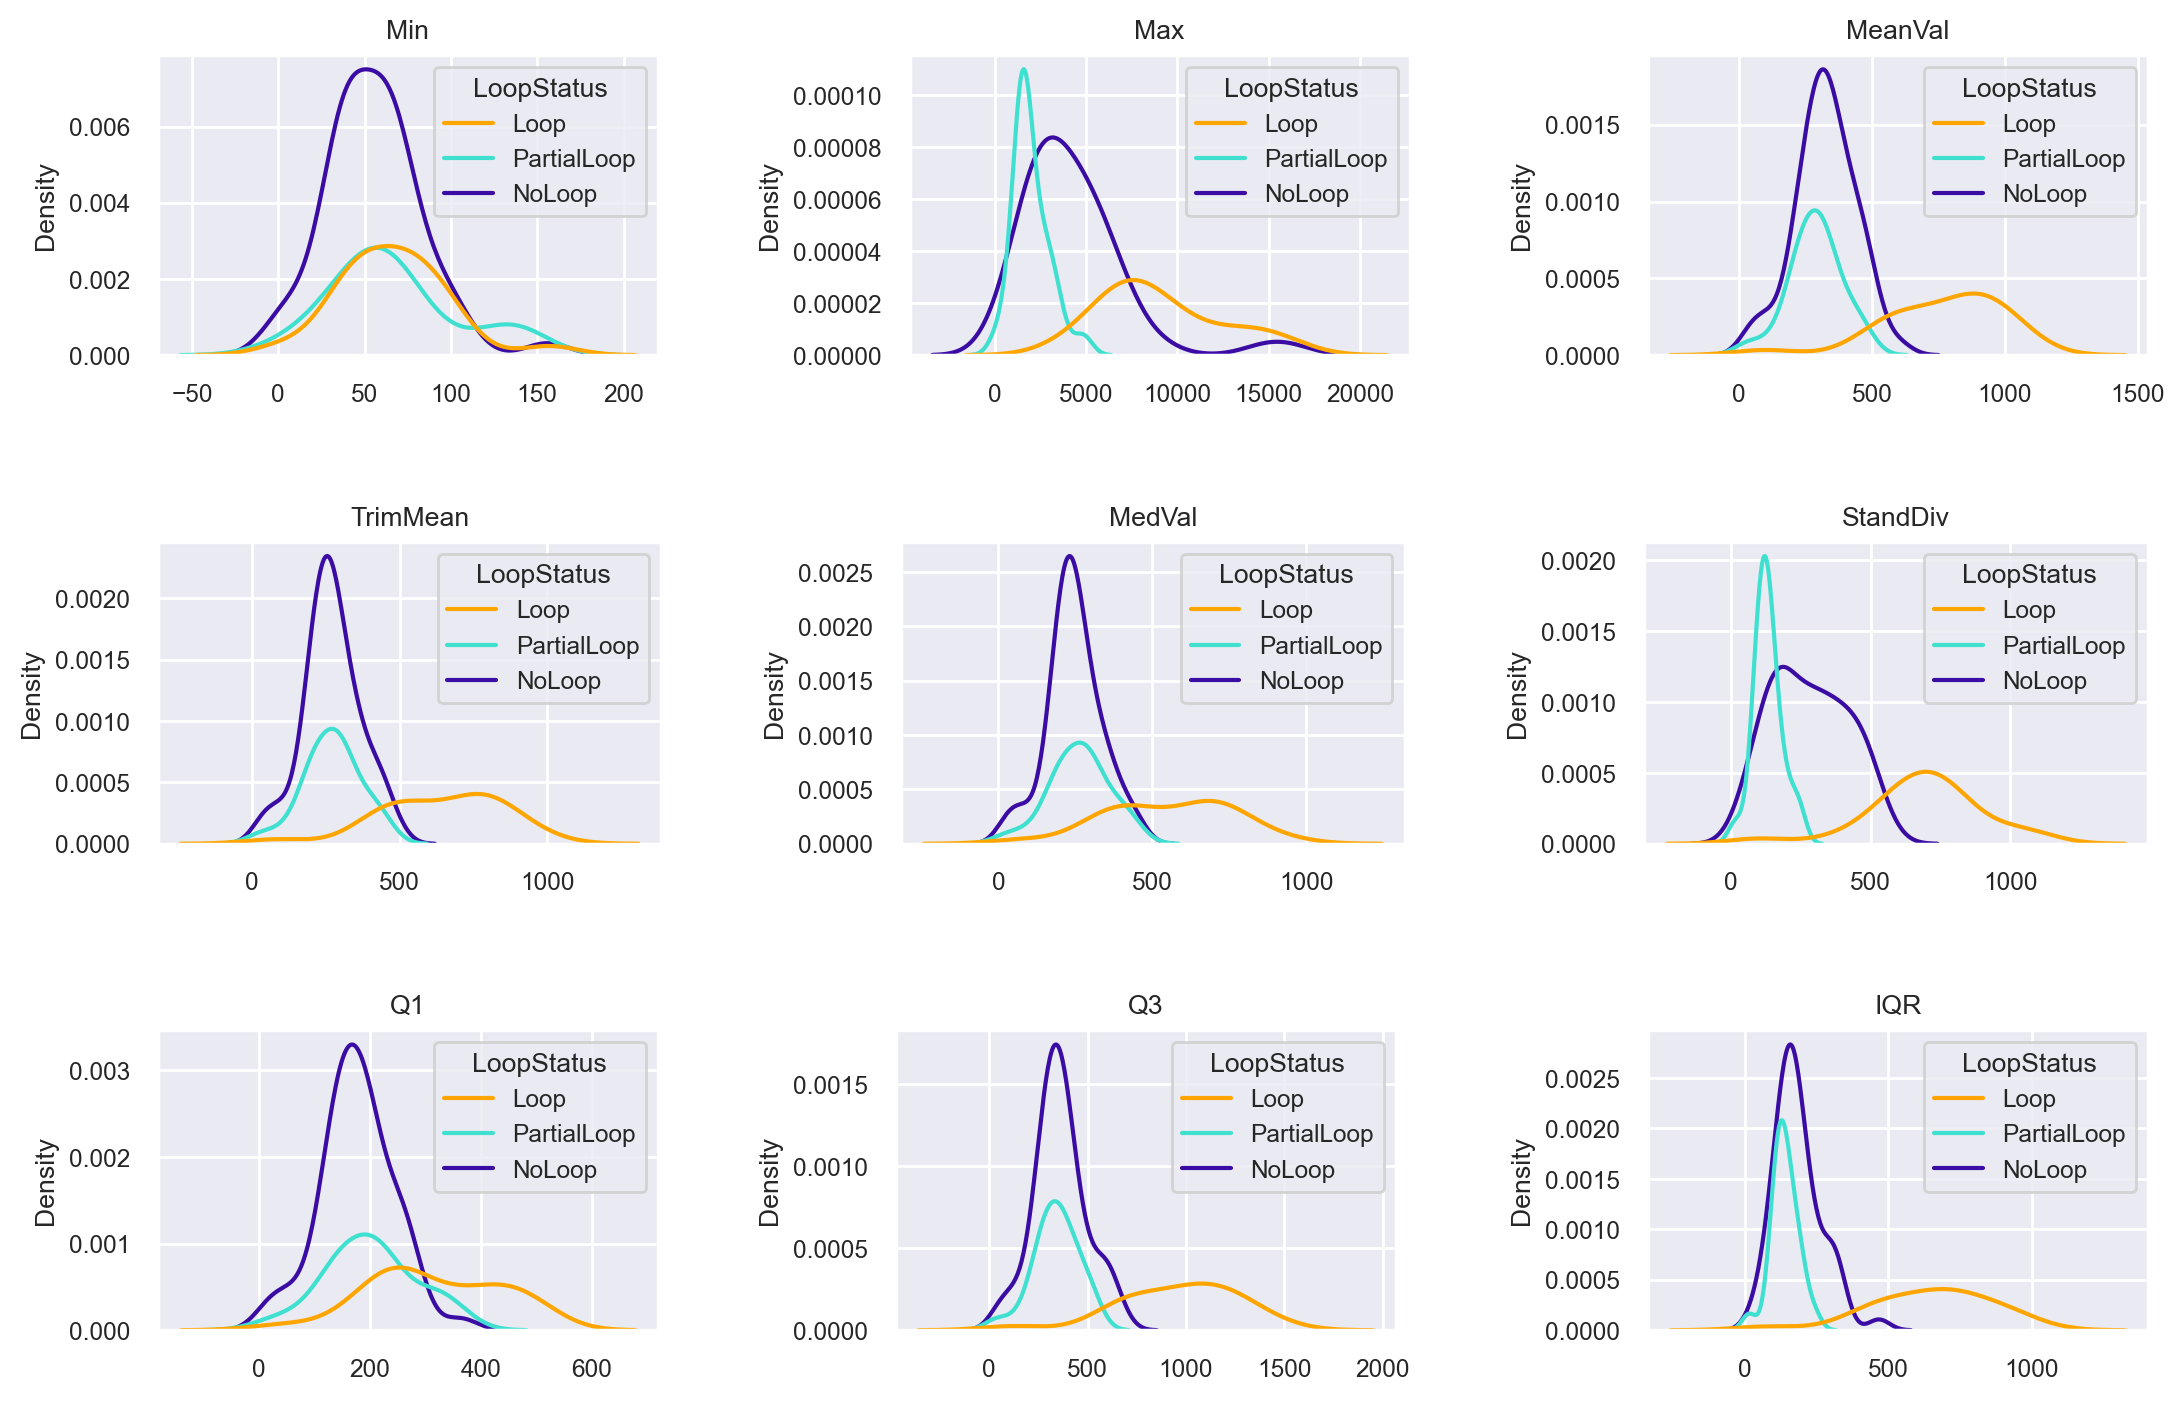

In [44]:

bx = []
sns.set(font_scale=0.8)

# Create subplots and plot density distributions
for i, col in enumerate(df.columns[2:]):
    # Create a new subplot with pw.Brick
    bx.append(pw.Brick(figsize=(2.5, 1.5)))

    # Create a distplot using seaborn
    sns.kdeplot(data=df, x=col, hue="LoopStatus",palette=myPal, ax=bx[i])

    # Set the title for each subplot
    bx[i].set_title(col)

    # Remove the x-axis label
    bx[i].set_xlabel(None)

# Combine the subplots
bxDist = (bx[0] | bx[1] | bx[2]) / (bx[3] | bx[4] | bx[5]) / (bx[6] | bx[7] | bx[8])

# Save the plot to a file (e.g., 'output.png')
bxDist.savefig('KDE.png')


In [ ]:
def SigTest(x,y):
    t_stat, p_val = stats.ttest_ind(x, y, equal_var = False, alternative="greater") 
    if (p_val<.01): 
        des="Significant"
    else:
        des="Not Significant"
    return [round(t_stat,6), round(p_val,6), des]

In [ ]:
TestDf=pd.DataFrame(columns=[ 'ttest value', 'p-value', 'Decision'])
for cc in df.columns[2:]:
    res=SigTest(df[cc].loc[df['LoopStatus']=='Loop'], df[cc].loc[df['LoopStatus']=='NoLoop'])
    TestDf.loc[cc]=res


In [ ]:
print(TestDf)

In [ ]:
t_stat, p_val = stats.ttest_ind(df['MeanVal'].loc[df['LoopStatus']=='Loop'], df['MeanVal'].loc[df['LoopStatus']=='NoLoop'], equal_var = False) 
print(t_stat, p_val)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=Maps[0])
Maps[0].plot(axes=ax, clip_interval=(1,99.5)*u.percent)
Maps[0].draw_limb(axes=ax, color='C0')
plt.show()

In [3]:
data=pd.read_csv('PartalLoopStatAnalysis.csv')

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
numerical_columns = ['Min', 'Max', 'MeanVal', 'TrimMean', 'MedVal', 'StandDiv', 'Q1', 'Q3', 'IQR']

# Melt the DataFrame to long format
df_long = data.melt(id_vars=['LoopStatus'], value_vars=numerical_columns, var_name='Variable', value_name='Value')




In [16]:
df_long

,LoopStatus,Variable,Value
0,Loop,Min,2.0
1,Loop,Min,53.0
2,Loop,Min,44.0
3,Loop,Min,39.0
4,Loop,Min,98.0
...,...,...,...
904,NoLoop,IQR,188.0
905,NoLoop,IQR,191.0
906,NoLoop,IQR,138.0
907,NoLoop,IQR,104.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


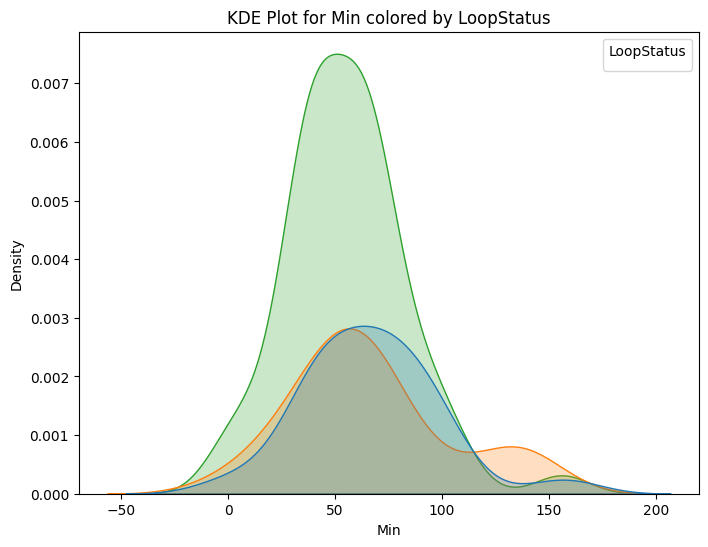

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


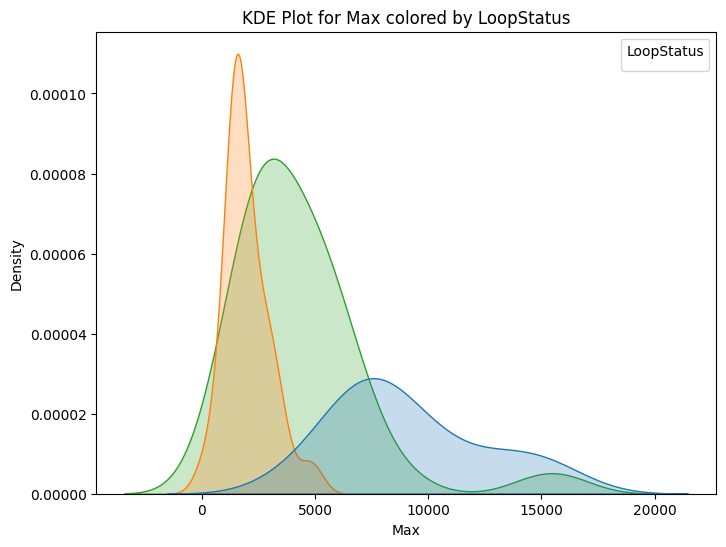

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


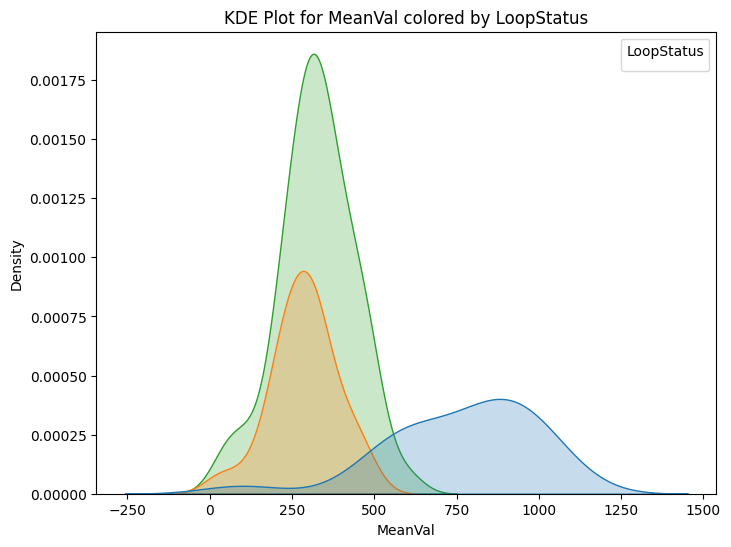

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


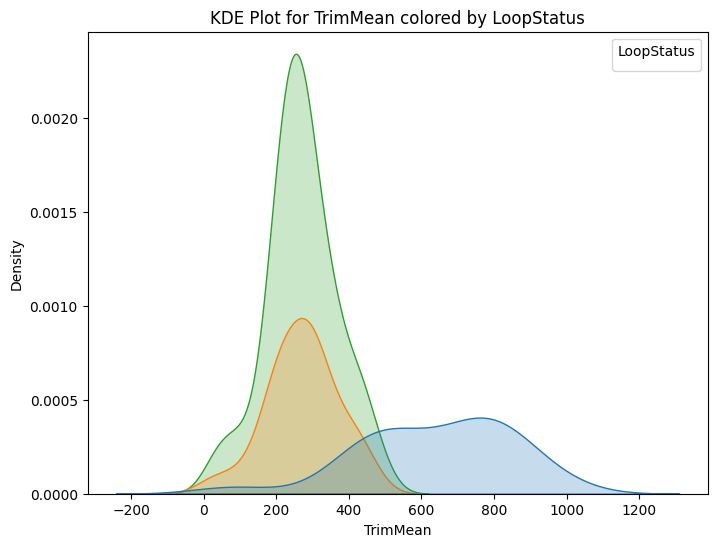

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


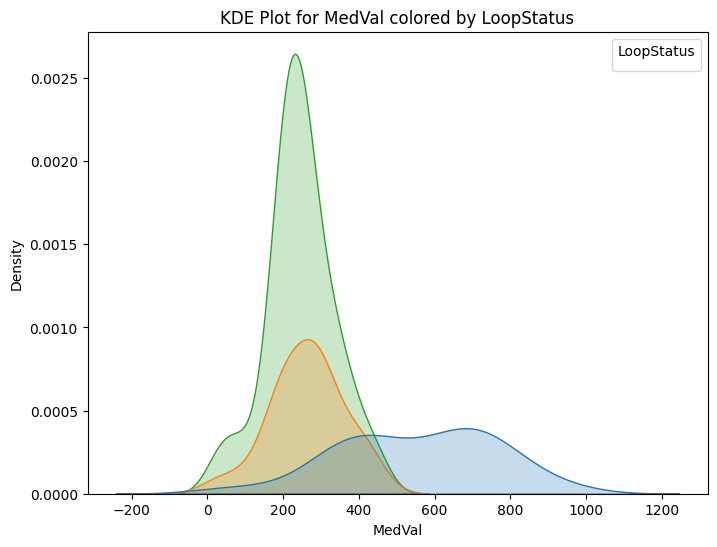

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


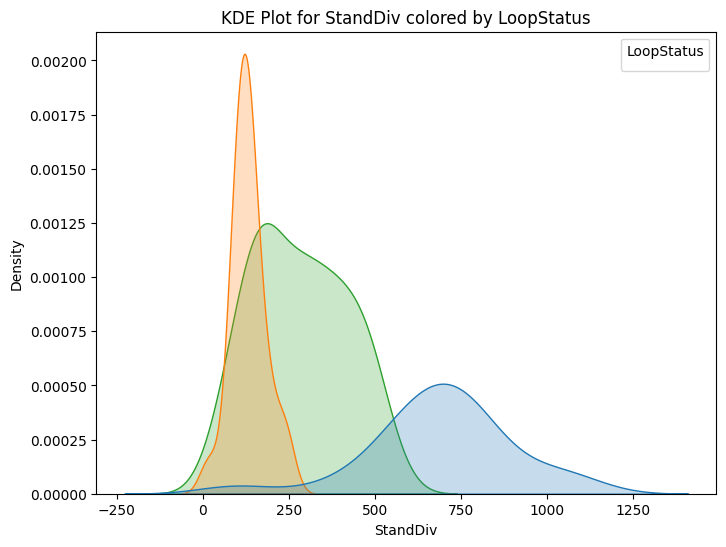

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


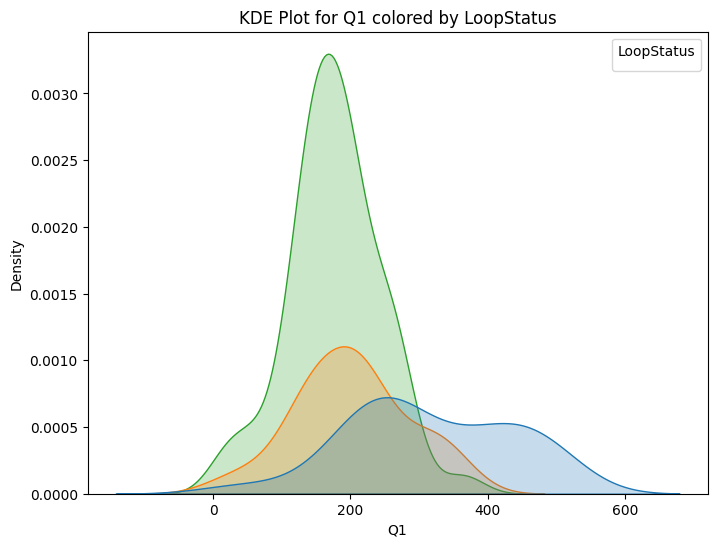

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


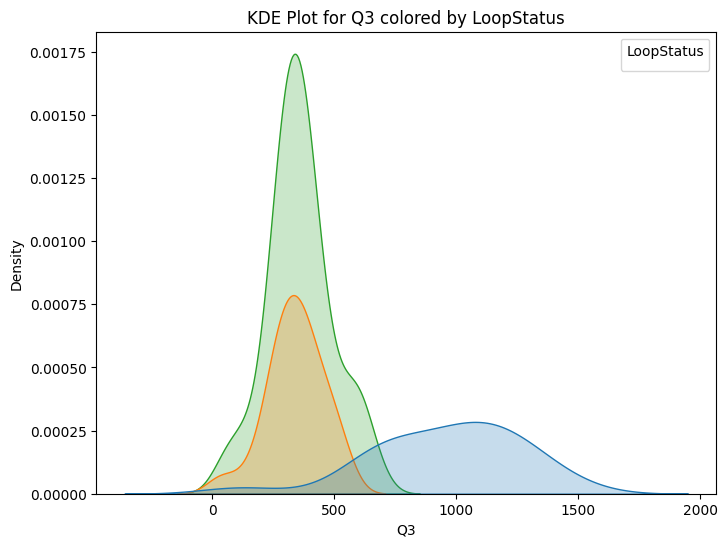

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


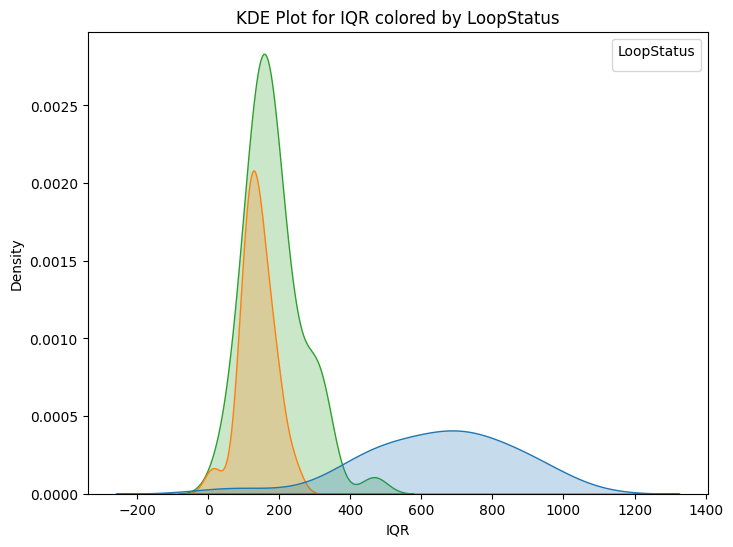

In [17]:
numerical_columns = ['Min', 'Max', 'MeanVal', 'TrimMean', 'MedVal', 'StandDiv', 'Q1', 'Q3', 'IQR']

# Plot KDEs for each numerical variable with separate curves for each category of 'LoopStatus'
for var in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=var, hue='LoopStatus', fill=True)
    plt.title(f'KDE Plot for {var} colored by LoopStatus')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend(title='LoopStatus')
    plt.show()

In [44]:
quantiles_tables = {}
for var in numerical_columns:
    quantiles_tables[var] = data.groupby('LoopStatus')[var].describe(percentiles=[.25, .5, .75]).round(2)
    print('------------------------ \n', var,'\n', quantiles_tables[var])



------------------------ 
 Min 
              count   mean    std  min    25%   50%    75%    max
LoopStatus                                                      
Loop          24.0  66.67  31.36  2.0  45.50  69.0  83.50  157.0
NoLoop        53.0  55.34  27.80  0.0  38.00  55.0  67.00  156.0
PartialLoop   24.0  66.58  36.87  2.0  44.75  60.5  74.75  140.0
------------------------ 
 Max 
              count     mean      std     min      25%     50%       75%  \
LoopStatus                                                                
Loop          24.0  9094.25  3344.86  3756.0  7172.25  8062.0  10723.50   
NoLoop        53.0  4283.62  2936.15   560.0  2306.00  3787.0   5371.00   
PartialLoop   24.0  1979.79   979.23   216.0  1410.75  1690.0   2573.75   

                 max  
LoopStatus            
Loop         16161.0  
NoLoop       16175.0  
PartialLoop   4806.0  
------------------------ 
 MeanVal 
              count    mean     std    min     25%     50%     75%      max
LoopSt

In [ ]:
# Combine all quantiles tables into a single DataFrame
quantiles_df = pd.concat(quantiles_tables, axis=1)

# Rename the columns for clarity
quantiles_df.columns = pd.MultiIndex.from_product([numerical_columns, quantiles_df.columns.levels[1]])

print("Quantiles table for each variable for each category of LoopStatus:")
quantiles_df